# Risk and Return Analysis

In [1]:
import numpy as np
import pandas_datareader
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import xlwings as xw

In [2]:
Stock = ['BEL.NS', 'LOVABLE.NS','SUNPHARMA.NS', 'GAIL.NS', 'HINDALCO.NS', 'WIPRO.NS', 'LAURUSLABS.NS', 'SMSPHARMA.NS']

In [3]:
tickers = [Stock[0], Stock[1], Stock[2], Stock[3], Stock[4], Stock[5], Stock[6], Stock[7],'^NSEI']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2020-4-1')['Adj Close']

In [4]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns

,BEL.NS,LOVABLE.NS,SUNPHARMA.NS,GAIL.NS,HINDALCO.NS,WIPRO.NS,LAURUSLABS.NS,SMSPHARMA.NS,^NSEI
Date,,,,,,,,,
2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,0.003938,-0.029550,0.010307,0.005328,0.001355,0.023238,0.005919,0.021859,0.011596
2020-07-03,0.087573,0.013036,0.008107,0.013436,-0.009179,0.002673,0.009002,-0.010089,0.005260
2020-07-06,0.050161,-0.000925,0.007001,-0.011505,0.052880,-0.009610,0.031660,-0.018104,0.014628
2020-07-07,-0.001469,0.011965,-0.001980,-0.008230,-0.013370,0.010055,0.003467,-0.002386,0.003339
...,...,...,...,...,...,...,...,...,...
2020-12-15,-0.002534,-0.006651,-0.008015,-0.001596,-0.007334,0.009544,0.000000,0.097843,0.000715
2020-12-16,-0.001269,0.094003,0.008622,-0.006810,0.027824,0.016032,0.031620,0.037688,0.008429
2020-12-17,0.018457,0.048790,-0.009147,-0.004027,-0.022523,-0.004194,0.009397,-0.043325,0.004230


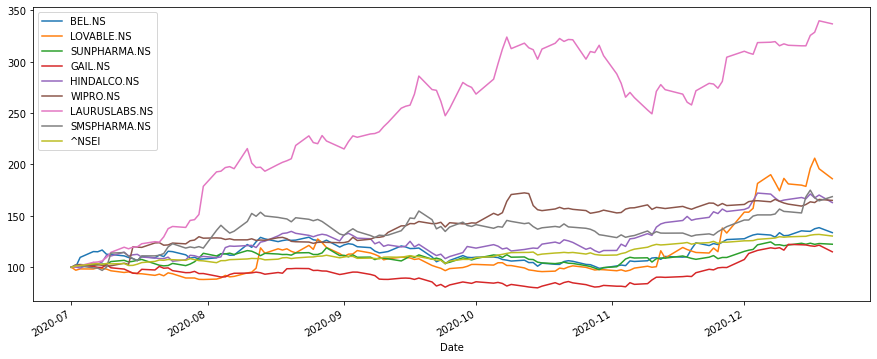

In [5]:
(sec_data / sec_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

# Return for Stock

In [6]:
sec_returns[[Stock[0],Stock[1],Stock[2],Stock[3],Stock[4],Stock[5],Stock[6],Stock[7],'^NSEI']].mean()*249

BEL.NS           0.601913
LOVABLE.NS       1.288687
SUNPHARMA.NS     0.419131
GAIL.NS          0.290138
HINDALCO.NS      1.012236
WIPRO.NS         1.039496
LAURUSLABS.NS    2.519482
SMSPHARMA.NS     1.084709
^NSEI            0.549905
dtype: float64

# Risk for Stock

In [7]:
Stock_risk = sec_returns[[Stock[0],Stock[1],Stock[2],Stock[3],Stock[4],Stock[5],Stock[6],Stock[7],'^NSEI']].std() * 250 ** 0.5
print (Stock_risk)

BEL.NS           0.399217
LOVABLE.NS       0.673143
SUNPHARMA.NS     0.307639
GAIL.NS          0.341744
HINDALCO.NS      0.412501
WIPRO.NS         0.353641
LAURUSLABS.NS    0.552102
SMSPHARMA.NS     0.488955
^NSEI            0.151577
dtype: float64


In [ ]:
Correlation = sec_returns[[Stock[0],Stock[1],Stock[2],Stock[3],Stock[4],Stock[5],Stock[6],Stock[7],'^NSEI']].corr()
Correlation

In [ ]:
wb = xw.Book('Portfolio Management.xlsx')
wb

In [ ]:
sheet = wb.sheets[0]
sheet

In [ ]:
sheet.range("K8").view = "Correlation"